In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.stats.api as sms

In [6]:
%matplotlib inline

In [7]:
!pwd

/Users/zzhang/Desktop/version_control/EPC_prod_boost


In [8]:
path = "/Users/zzhang/Desktop"
dataset = os.path.join(path , "epc_nonepc_product_quality.csv")

In [10]:
df = pd.read_csv(dataset)

In [12]:
df.drop(["v","time"], axis=1, inplace = True)

In [13]:
df.head(10)

,wish_id,epc_product_id,epc_true_price,epc_product_rating,epc_product_rating_count,epc_gmv,epc_product_refund_ratio,epc_shipping_refund_rate_45d_ago,epc_conversion_rate,epc_clicks,...,noepc_product_rating,noepc_product_rating_count,noepc_gmv,noepc_product_refund_ratio,noepc_shipping_refund_rate_45d_ago,noepc_conversion_rate,noepc_clicks,noepc_add_to_carts_i,noepc_trans_last_90_d,noepc_score
0,5c7de9de79094f6f6adc8c38,5bebb8946ab0fc16c8484fe6,2.534729,4.506127,816.0,16916.0,0.020930,0.020195,0.000554,97053.0,...,4.196429,56.0,2011.0,0.108108,0.012327,0.000679,11067.0,3441.0,516.0,4.544079
1,5c7de9de79094f6f6adc8c39,5b617ff94413152cf848164d,2.445215,3.872460,2313.0,52368.0,0.119348,0.020755,0.000662,314985.0,...,5.000000,1.0,NaN,0.000000,0.000000,0.000000,21.0,0.0,NaN,3.500000
2,5c7de9de79094f6f6adc8c3a,5c96381e0dc8866b25f1bbda,3.768878,4.247104,518.0,12793.0,0.025773,0.021982,0.000505,65522.0,...,4.342857,805.0,23838.0,0.050505,0.014384,0.000415,176136.0,29374.0,4445.0,5.355257
3,5c7de9de79094f6f6adc8c3b,5b3b76df55c044257633e061,2.467128,4.162298,1984.0,13884.0,0.019521,0.089013,0.000459,129943.0,...,4.241333,750.0,14487.0,0.046358,0.007792,0.000366,91747.0,18189.0,3103.0,5.075064
4,5c7de9de79094f6f6adc8c3c,5bfa55cd0bca725102906e33,2.577778,4.294931,217.0,4578.0,0.058824,0.021196,0.000585,24746.0,...,4.391304,46.0,297.0,0.095890,0.054920,0.000365,2437.0,741.0,83.0,4.048201
5,5c7de9de79094f6f6adc8c3d,589db91c7f2980540de371fb,2.314845,4.191743,2180.0,19160.0,0.071322,0.007514,0.000598,132531.0,...,4.258065,31.0,1055.0,0.090909,0.031519,0.001797,2921.0,998.0,206.0,4.975027
6,5c7de9de79094f6f6adc8c3e,59f6dd1b72e71f6eb096f7ae,2.574793,4.119363,377.0,7190.0,0.078231,0.023816,0.000639,40331.0,...,4.173077,884.0,12503.0,0.083958,0.024948,0.000627,78589.0,28006.0,3039.0,4.917568
7,5c7de9de79094f6f6adc8c3f,5d5257cf63545d2044f59c94,8.694881,3.880597,67.0,37538.0,NaN,NaN,0.000441,157980.0,...,3.815789,38.0,2260.0,NaN,0.000000,0.000295,10147.0,2218.0,226.0,4.584242
8,5c7de9de79094f6f6adc8c40,5bfa90d441ada009fa8c22d0,2.502299,4.369159,214.0,2415.0,0.014815,0.052317,0.000252,27895.0,...,4.666667,12.0,240.0,0.000000,0.037500,0.000530,1142.0,278.0,57.0,4.374994
9,5c7de9de79094f6f6adc8c41,5a0d6cd3591d3a068ebd015e,7.026462,4.320140,859.0,24396.0,0.084942,0.075184,0.000517,71068.0,...,4.528302,53.0,2978.0,0.064516,0.027586,0.000292,12622.0,1299.0,145.0,5.548879


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223999 entries, 0 to 2223998
Data columns (total 25 columns):
wish_id                               object
epc_product_id                        object
epc_true_price                        float64
epc_product_rating                    float64
epc_product_rating_count              float64
epc_gmv                               float64
epc_product_refund_ratio              float64
epc_shipping_refund_rate_45d_ago      float64
epc_conversion_rate                   float64
epc_clicks                            float64
epc_add_to_carts_i                    float64
epc_trans_last_90_d                   float64
epc_score                             float64
noepc_product_id                      object
noepc_true_price                      float64
noepc_product_rating                  float64
noepc_product_rating_count            float64
noepc_gmv                             float64
noepc_product_refund_ratio            float64
noepc_shipping_r

In [15]:
df.describe()

,epc_true_price,epc_product_rating,epc_product_rating_count,epc_gmv,epc_product_refund_ratio,epc_shipping_refund_rate_45d_ago,epc_conversion_rate,epc_clicks,epc_add_to_carts_i,epc_trans_last_90_d,...,noepc_product_rating,noepc_product_rating_count,noepc_gmv,noepc_product_refund_ratio,noepc_shipping_refund_rate_45d_ago,noepc_conversion_rate,noepc_clicks,noepc_add_to_carts_i,noepc_trans_last_90_d,noepc_score
count,516892.000000,431294.000000,431294.000000,516775.000000,295768.000000,495062.000000,1.074409e+06,1.395508e+06,1.395508e+06,405286.000000,...,480326.000000,480326.000000,640283.000000,274589.000000,609224.000000,1.289850e+06,2.061167e+06,2.061167e+06,426745.000000,2.061167e+06
mean,11.971976,4.355513,39.531572,1234.674932,0.048386,0.023004,1.947691e-04,3.142676e+03,3.708513e+02,123.519816,...,4.411282,13.080606,531.436854,0.037390,0.022164,1.909801e-04,9.929507e+02,9.877575e+01,43.729789,2.261792e+00
std,12.743104,0.640876,142.266689,4146.474702,0.066497,0.069289,6.823759e-04,1.507732e+04,3.180067e+03,404.074892,...,0.741896,62.964415,2409.533149,0.061962,0.072199,1.580565e-03,7.638747e+03,1.095855e+03,230.683006,9.269096e-01
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,-1.166667e+00
25%,4.114153,4.090909,2.000000,42.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.000000,...,4.000000,1.000000,31.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000,1.820000e+00
50%,8.599353,4.464286,6.000000,168.000000,0.000000,0.000000,0.000000e+00,6.000000e+00,0.000000e+00,19.000000,...,4.600000,3.000000,90.000000,0.000000,0.000000,0.000000e+00,3.000000e+00,0.000000e+00,7.000000,1.820000e+00
75%,16.943493,4.875000,27.000000,928.000000,0.076923,0.023810,2.238249e-04,4.610000e+02,4.200000e+01,78.000000,...,5.000000,7.000000,285.000000,0.076923,0.010870,1.848685e-04,1.860000e+02,1.300000e+01,22.000000,1.980000e+00
max,1200.678876,5.000000,25421.000000,999102.000000,0.684492,1.000000,2.000000e-01,2.351409e+06,9.900360e+05,26104.000000,...,5.000000,13130.000000,367271.000000,0.676056,1.000000,1.000000e+00,1.629263e+06,4.901580e+05,27417.000000,2.464893e+01


In [34]:
df_score = df[["epc_product_id","epc_score","noepc_product_id","noepc_score"]]

In [35]:
df_score['is_epc_better'] = (df_score['epc_score'] >= df_score['noepc_score'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_score.head()

,epc_product_id,epc_score,noepc_product_id,noepc_score,is_epc_better
0,5bebb8946ab0fc16c8484fe6,5.687301,5c81d2ccd2430a608540685c,4.544079,True
1,5b617ff94413152cf848164d,5.033658,5c36b4fa2a0725560d6cdbb9,3.500000,True
2,5c96381e0dc8866b25f1bbda,5.778153,5ca588b3edc85008cf299379,5.355257,True
3,5b3b76df55c044257633e061,4.745407,5c4172d67527b43dcc64c66b,5.075064,False
4,5bfa55cd0bca725102906e33,5.034684,5bff866d35c7276ed3d7183d,4.048201,True


1. 1.4M product groups have epc swappable products
2. 2M product groups have non-epc swappable products
3. Total is 2.2M product groups

In [43]:
df_score.count()

epc_product_id      1395508
epc_score           1395508
noepc_product_id    2061167
noepc_score         2061167
is_epc_better       2223999
dtype: int64

## Analysis on score used for swappable prod ranking

### Mean and 95%CI

In [124]:
def mean_ci(x, y , alpha=0.05, metrics_name = 'score'):
    print('---------------------------------------------------------------------------------------------------')
    
    epc_mean = x.mean()
    noepc_mean = y.mean()
    
    mask1 = x.notnull()
    mask2 = y.notnull()
    epc_kpi = x[mask1]
    noepc_kpi = y[mask2]
    
    lower_epc, upper_epc = sms.DescrStatsW(epc_kpi).tconfint_mean(alpha=alpha)
    lower_noepc, upper_noepc = sms.DescrStatsW(noepc_kpi).tconfint_mean(alpha=alpha)
    
    is_95CI_overlap = (lower_epc <= upper_noepc and lower_epc>=lower_noepc) or (upper_epc >= lower_noepc and upper_epc<= upper_noepc)
    
    print( "Below is the summary of kpi - %s, epc and non-epc groups:" %metrics_name )
    print( "The mean of kpi - %s, is %5.2f for epc, and %5.2f for non-epc" % (metrics_name, epc_mean, noepc_mean) )
    print( "The %i%% CI of kpi - %s, is [%6.3f,%6.3f] for epc" % (100-100*alpha ,metrics_name, lower_epc, upper_epc) )
    print( "The %i%% CI of kpi - %s, is [%6.3f,%6.3f] for nonepc" % (100-100*alpha , metrics_name, lower_noepc, upper_noepc) )
    print( "Does the %i%% CI of kpi - %s overlap across epc and non-epc groups? %s" %(100-100*alpha, metrics_name, str(is_95CI_overlap).upper()) )
    print('---------------------------------------------------------------------------------------------------')

In [125]:
epc = df['epc_score']
noepc = df['noepc_score']

mean_ci(epc, noepc, alpha=0.05, metrics_name = 'score')

---------------------------------------------------------------------------------------------------
Below is the summary of kpi - score, epc and non-epc groups:
The mean of kpi - score, is  2.48 for epc, and  2.26 for non-epc
The 95% CI of kpi - score, is [ 2.479, 2.483] for epc
The 95% CI of kpi - score, is [ 2.261, 2.263] for nonepc
Does the 95% CI of kpi - score overlap across epc and non-epc groups? FALSE
---------------------------------------------------------------------------------------------------


In [126]:
epc = df['epc_true_price']
noepc = df['noepc_true_price']

mean_ci(epc, noepc, alpha=0.05, metrics_name = 'true_price')

---------------------------------------------------------------------------------------------------
Below is the summary of kpi - true_price, epc and non-epc groups:
The mean of kpi - true_price, is 11.97 for epc, and 18.05 for non-epc
The 95% CI of kpi - true_price, is [11.937,12.007] for epc
The 95% CI of kpi - true_price, is [17.993,18.116] for nonepc
Does the 95% CI of kpi - true_price overlap across epc and non-epc groups? FALSE
---------------------------------------------------------------------------------------------------


In [127]:
epc = df['epc_product_rating']
noepc = df['noepc_product_rating']

mean_ci(epc, noepc, alpha=0.05, metrics_name = 'product_rating')

---------------------------------------------------------------------------------------------------
Below is the summary of kpi - product_rating, epc and non-epc groups:
The mean of kpi - product_rating, is  4.36 for epc, and  4.41 for non-epc
The 95% CI of kpi - product_rating, is [ 4.354, 4.357] for epc
The 95% CI of kpi - product_rating, is [ 4.409, 4.413] for nonepc
Does the 95% CI of kpi - product_rating overlap across epc and non-epc groups? FALSE
---------------------------------------------------------------------------------------------------


In [128]:
epc = df['epc_product_rating_count']
noepc = df['noepc_product_rating_count']

mean_ci(epc, noepc, alpha=0.05, metrics_name = 'product_rating_count')

---------------------------------------------------------------------------------------------------
Below is the summary of kpi - product_rating_count, epc and non-epc groups:
The mean of kpi - product_rating_count, is 39.53 for epc, and 13.08 for non-epc
The 95% CI of kpi - product_rating_count, is [39.107,39.956] for epc
The 95% CI of kpi - product_rating_count, is [12.903,13.259] for nonepc
Does the 95% CI of kpi - product_rating_count overlap across epc and non-epc groups? FALSE
---------------------------------------------------------------------------------------------------


### Run 2 kinds of T-test on metrics

### Run traditional T-test:

In [153]:
def t_test(x, y , metrics_name = 'score', alpha=0.05):
    
    print('---------------------------------------------------------------------------------------------------')
    
    mask1 = x.notnull()
    mask2 = y.notnull()
    epc_kpi = x[mask1]
    noepc_kpi = y[mask2]
    
    t_stat, p_value = stats.ttest_ind(epc_kpi,noepc_kpi)
    
    t_stat_welch, p_value_welch = stats.ttest_ind(epc_kpi,noepc_kpi,equal_var=False)
    
    print("Below is the t-test summary of kpi - %s, epc and non-epc groups:" %metrics_name)
    print('\n')
    print("Classic t statistics is: %4.2f with p-value : %4.2f" % (t_stat,p_value))
    if p_value<=alpha:
        print("Which means the difference on kpi - %s is significant at Type-I error = %4.2f %% level" %(metrics_name,alpha*100))
    else:
        print("Which means the difference on kpi - %s is NOT significant at Type-I error = %4.2f %% level" %(metrics_name,alpha*100))
    print('\n')
    print("Welch t statistics is: %4.2f with p-value : %4.2f" % (t_stat_welch,p_value_welch))
    if p_value<=alpha:
        print("Which means the difference on kpi - %s is significant at Type-I error = %4.2f %% level" %(metrics_name,alpha*100))
    else:
        print("Which means the difference on kpi - %s is NOT significant at Type-I error = %4.2f %% level" %(metrics_name,alpha*100))
    print('---------------------------------------------------------------------------------------------------')

In [154]:
epc = df['epc_score']
noepc = df['noepc_score']

t_test(epc, noepc, metrics_name = 'score')

---------------------------------------------------------------------------------------------------
Below is the t-test summary of kpi - score, epc and non-epc groups:


Classic t statistics is: 197.74 with p-value : 0.00
Which means the difference on kpi - score is significant at Type-I error = 5.00 % level


Welch t statistics is: 190.67 with p-value : 0.00
Which means the difference on kpi - score is significant at Type-I error = 5.00 % level
---------------------------------------------------------------------------------------------------


In [155]:
epc = df['epc_true_price']
noepc = df['noepc_true_price']

t_test(epc, noepc, metrics_name = 'true_price')

---------------------------------------------------------------------------------------------------
Below is the t-test summary of kpi - true_price, epc and non-epc groups:


Classic t statistics is: -159.17 with p-value : 0.00
Which means the difference on kpi - true_price is significant at Type-I error = 5.00 % level


Welch t statistics is: -169.43 with p-value : 0.00
Which means the difference on kpi - true_price is significant at Type-I error = 5.00 % level
---------------------------------------------------------------------------------------------------


In [156]:
epc = df['epc_product_rating']
noepc = df['noepc_product_rating']

t_test(epc, noepc, metrics_name = 'product_rating')

---------------------------------------------------------------------------------------------------
Below is the t-test summary of kpi - product_rating, epc and non-epc groups:


Classic t statistics is: -38.20 with p-value : 0.00
Which means the difference on kpi - product_rating is significant at Type-I error = 5.00 % level


Welch t statistics is: -38.50 with p-value : 0.00
Which means the difference on kpi - product_rating is significant at Type-I error = 5.00 % level
---------------------------------------------------------------------------------------------------


In [157]:
epc = df['epc_product_rating_count']
noepc = df['noepc_product_rating_count']

t_test(epc, noepc, metrics_name = 'product_rating_count')

---------------------------------------------------------------------------------------------------
Below is the t-test summary of kpi - product_rating_count, epc and non-epc groups:


Classic t statistics is: 116.75 with p-value : 0.00
Which means the difference on kpi - product_rating_count is significant at Type-I error = 5.00 % level


Welch t statistics is: 112.60 with p-value : 0.00
Which means the difference on kpi - product_rating_count is significant at Type-I error = 5.00 % level
---------------------------------------------------------------------------------------------------


# Below are boxplot and density distribution charts, which is bonus point
    * Further analysis can be conducted if being asked

## Boxplot chart

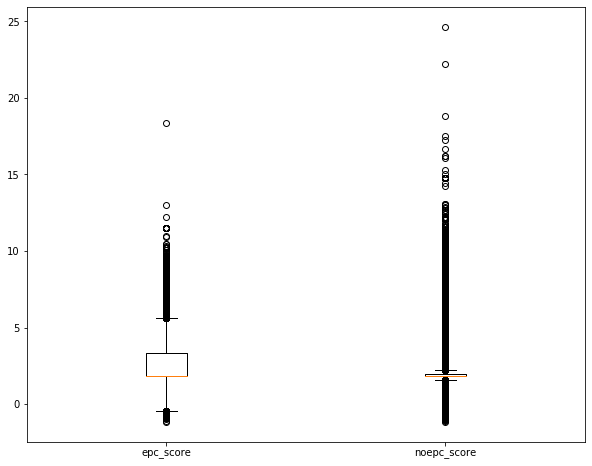

In [85]:
plt.figure(figsize=(10,8))
data_to_plot = [epc_score,noepc_score]
plt.boxplot(data_to_plot)
plt.xticks([1, 2], ['epc_score', 'noepc_score'])
plt.show()

## Kernel density chart:

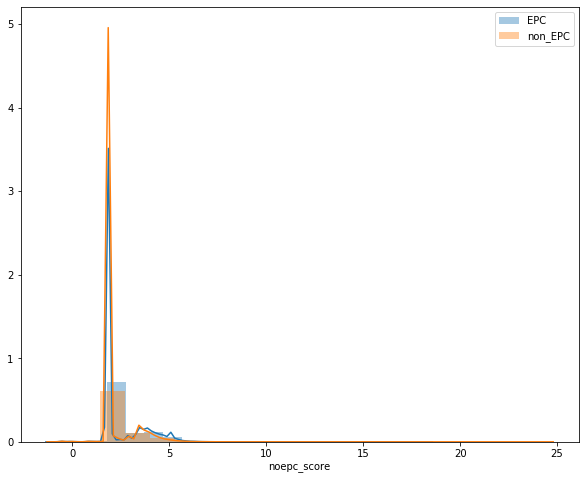

In [78]:
plt.figure(figsize=(10,8))
sns.distplot(epc_score,bins=20)
sns.distplot(noepc_score,bins=20)
plt.legend(labels=['EPC', 'non_EPC'])

## log trnasformation view

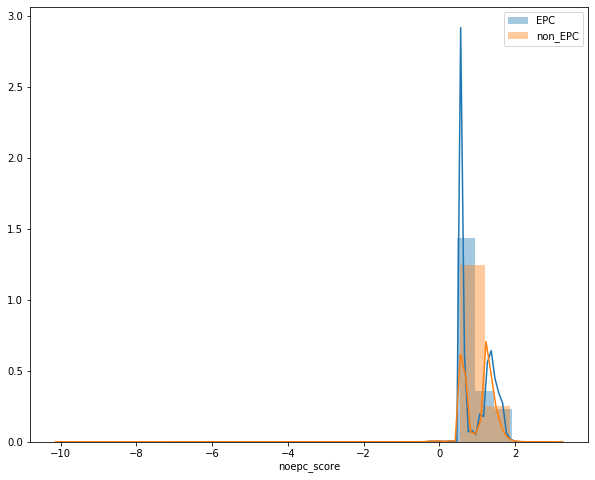

In [79]:
plt.figure(figsize=(10,8))
sns.distplot(np.log(epc_score[np.isfinite(epc_score.apply(np.log))]),bins=20)
sns.distplot(np.log(noepc_score[np.isfinite(noepc_score.apply(np.log))]),bins=20)
plt.legend(labels=['EPC', 'non_EPC'])